# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Chusnuut Tacharri
- **Email:** uuttacharri27@gmail.com
- **ID Dicoding:** ctacharri

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola peminjaman sepeda antara hari libur dan hari kerja pada sepeda yang disewa per hari?
- Bagaimana korelasi antara variabel cuaca (weathersit, suhu, kecepatan angin) dengan jumlah total sepeda yang dipinjam per hari?
- Apakah terdapat pola peminjaman sepeda yang berbeda di setiap musim (springer, summer, fall, winter) pada sepeda yang disewa per jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Memuat Tabel day**

In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat Tabel hour**

In [4]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa adanya duplikasi data

In [6]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa adanya duplikasi data

In [9]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Membersihkan Data day_df

In [11]:
day_df.isna().sum() #Tida terdapat missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengganti tipe data dteday menjadi datetime

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info() #memeriksa tipe data sesuai harapan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan Data hour_df

In [14]:
hour_df.isna().sum() #Tida terdapat missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengganti tipe data dteday menjadi datetime

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
hour_df.info() #memeriksa tipe data sesuai harapan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

Eksplorasi Data day_df

melihat rangkuman parameter statistik dari data day_df

In [17]:
day_df.describe(include="all")

<ipython-input-17-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


*Demografi peminjam berdasarkan musim (1: Spring, 2: Summer, 3: fall, 4: winter)*

In [18]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Berdasarkan pivot table di atas dapat diketahui bahwa musim yang paling ramai oleh peminjam sepeda yaitu pada musim gugur (3) dengan didominasi paling rame peminjam 8714 dan sepi peminjam 1115.

*Pesebaran peminjam berdasarkan hari libur (holiday)*

In [19]:
day_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False) # 0: tidak hari libur; 1: hari libur

holiday
0    679
1     20
Name: cnt, dtype: int64

Berdasarkan data di atas, pesebaran peminjam sepeda banyak dilakukan pada hari yang tidak libur dengan mencapai 679 peminjam.

*Pesebaran peminjam berdasarkan hari kerja (weekday)*

In [20]:
day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)
# 0: minggu; 1: senin; 2: selasa; 3: Rabu; 4: Kamis; 5:Jumat; 6: Sabtu

weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64

Berdasarkan data di atas, persebaran peminjaman sepeda banyak dilakukan pada hari Minggu, Senin, Selasa, Jumat, dan Sabtu dengan peminjam sebesar 104 peminjam.

*Melihat data situasi cuaca (weathersit)*

In [21]:
day_df.sort_values(by="weathersit", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
324,325,2011-11-21,4,0,11,0,1,1,3,0.447500,0.445062,0.910000,0.138054,220,2545,2765
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
339,340,2011-12-06,4,0,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594
325,326,2011-11-22,4,0,11,0,2,1,3,0.416667,0.421696,0.962500,0.118792,69,1538,1607
319,320,2011-11-16,4,0,11,0,3,1,3,0.456667,0.451988,0.930000,0.136829,145,1672,1817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,2012-01-14,1,1,1,0,6,0,1,0.180000,0.183087,0.457500,0.187183,333,2160,2493
377,378,2012-01-13,1,1,1,0,5,1,1,0.274167,0.249362,0.507500,0.378108,174,3040,3214
130,131,2011-05-11,2,0,5,0,3,1,1,0.542500,0.528400,0.632917,0.120642,550,3632,4182
131,132,2011-05-12,2,0,5,0,4,1,1,0.535000,0.523363,0.747500,0.189667,695,4169,4864


*Melihat data suhu tertinggi dan terendah*

In [22]:
day_df.sort_values(by="temp", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
202,203,2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.133100,562,2825,3387
209,210,2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846
545,546,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986


*Melihat data kecepatan angin(windspeed)*

In [23]:
day_df.sort_values(by="windspeed", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117


Eksplorasi Data hour_df

In [24]:
hour_df.describe(include="all")

<ipython-input-24-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Demografi peminjaman sepeda berdasarkan tiap musim yang dilakukan tiap jam

In [25]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
       nunique  max min        mean         std
season                                         
1         4242  801   1  111.114569  119.224010
2         4409  957   1  208.344069  188.362473
3         4496  977   1  236.016237  197.711630
4         4232  967   1  198.868856  182.967972

Berdasarkan pivot table di atas dapat diketahui bahwa musim yang paling ramai oleh peminjam sepeda yaitu pada musim gugur (3) dengan didominasi paling rame peminjam 977 dan sepi peminjam 1.

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola peminjaman sepeda antara hari libur dan hari kerja pada sepeda yang disewa per hari?

<ipython-input-26-992ac763519a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_df, palette= ['darkblue','orange'])


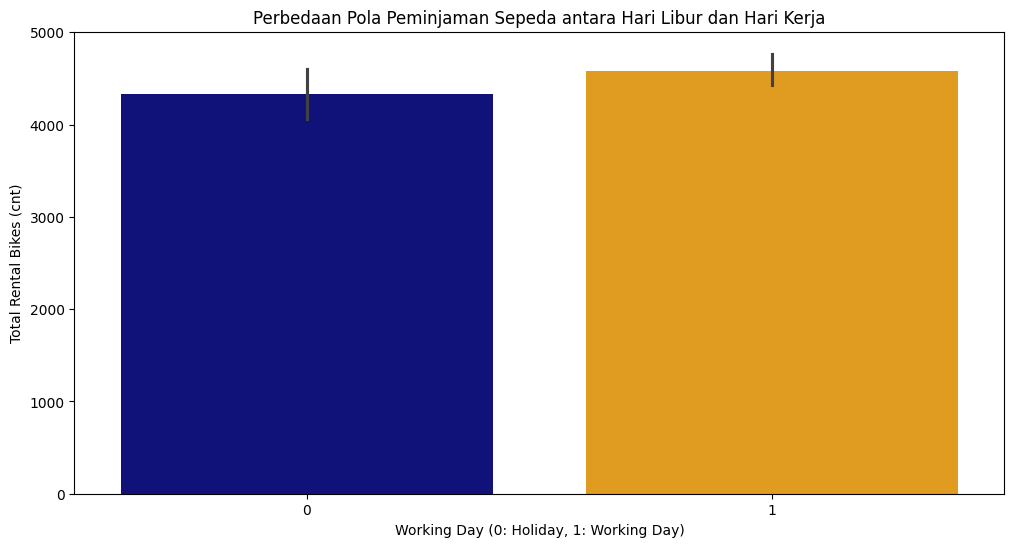

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='workingday', y='cnt', data=day_df, palette= ['darkblue','orange'])
plt.title('Perbedaan Pola Peminjaman Sepeda antara Hari Libur dan Hari Kerja')
plt.xlabel('Working Day (0: Holiday, 1: Working Day)')
plt.ylabel('Total Rental Bikes (cnt)')
plt.show()

### Pertanyaan 2: Bagaimana korelasi antara variabel cuaca (weathersit, kelembapan udara, suhu, kecepatan angin) dengan jumlah total sepeda yang dipinjam per hari?

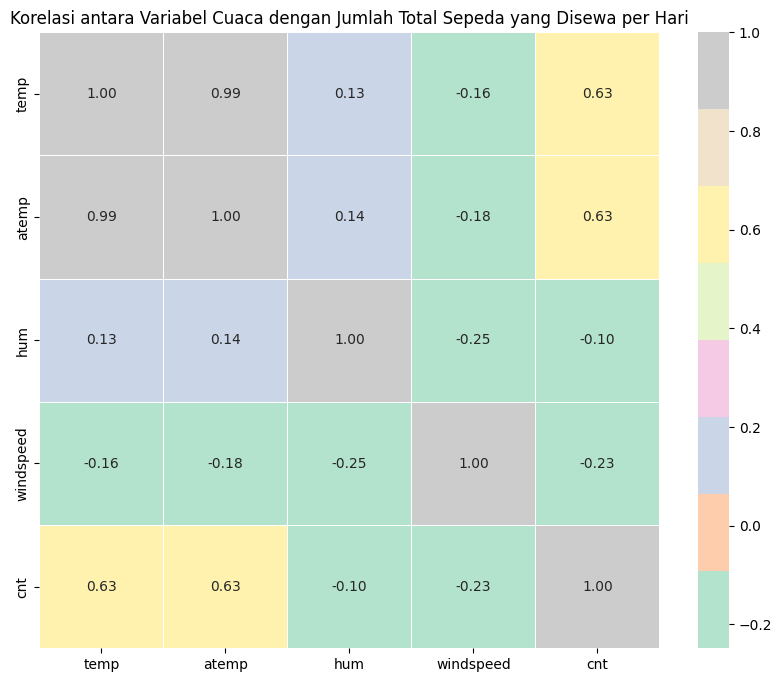

In [27]:
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel2', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Variabel Cuaca dengan Jumlah Total Sepeda yang Disewa per Hari')
plt.show()

###Pertanyaan 3: Apakah terdapat pola peminjaman sepeda yang berbeda di setiap musim (springer, summer, fall, winter) pada sepeda yang disewa per jam?

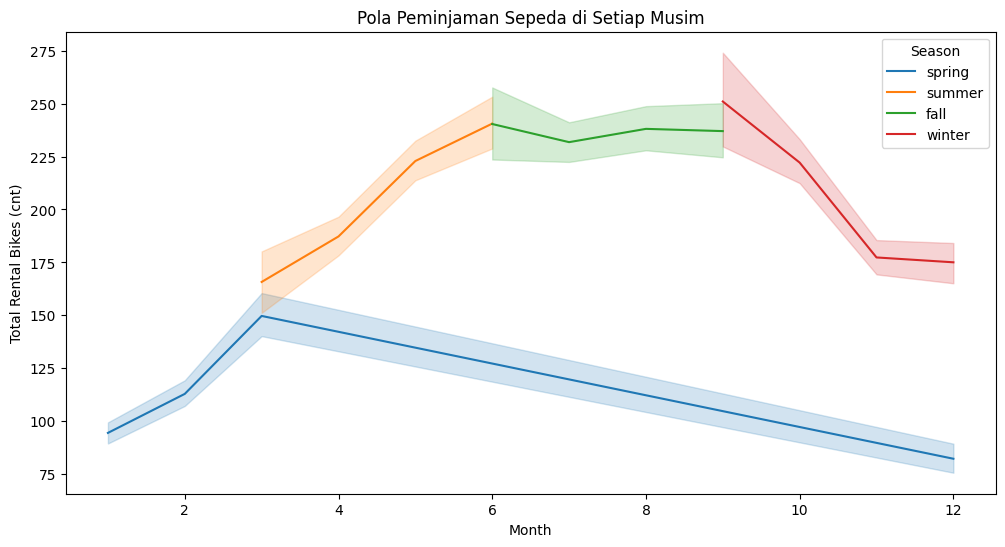

In [28]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
hour_df['season_label'] = hour_df['season'].map(season_mapping)

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='season_label', data=hour_df)
plt.title('Pola Peminjaman Sepeda di Setiap Musim')
plt.xlabel('Month')
plt.ylabel('Total Rental Bikes (cnt)')
plt.legend(title='Season')
plt.show()

## Conclusion

- Conclution pertanyaan 1 Bagaimana perbedaan pola peminjaman sepeda antara hari libur dan hari kerja pada sepeda yang disewa per hari?

Berdasarkan data di atas dapat disimpulkan bahwa peminjaman sepeda banyak dilakukan pada working day:1 daripada holiday:0

- Conclution pertanyaan 2 Bagaimana korelasi antara variabel cuaca (weathersit, suhu, kecepatan angin) dengan jumlah total sepeda yang dipinjam per hari?

Korelasi antara suhu dan total peminjam sepeda per hari memiliki korelasi positif dimana semakin tinggi suhu total peminjam sepeda semakin banyak.

Korelasi antara kecepatan angin dan cuaca dengan total peminjam sepeda per hari memiliki korelasi negatif dimana semakin tinggi kecepatan angin maka diikuti cuaca yang buruk sehingga total peminjam mengalami penurunan.


- Conclution pertanyaan 3 Apakah terdapat pola peminjaman sepeda yang berbeda di setiap musim (springer, summer, fall, winter) pada sepeda yang disewa per jam?

Terdapat pola peminjaman sepeda pada di setiap musim. Peminjaman sepeda tertinggi dilakukan pada musim dingin di bulan september, pada musim panas jumlah peminjam sepeda mengalami kenaikan di bulan juni walaupun tidak sebanyak di musim dingin. Pada musim gugur mengalami jummlah peminjam sepeda yang cukup stabil, namun pada musim semi mengalami penurunan peminjaman sepeda di bulan April-Desember.

#**RFM Analysis**

In [29]:
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "dteday": "max", # mengambil tanggal order terakhir
    "cnt": ["nunique", "sum"] # menghitung jumlah peminjam sepeda
})
rfm_df.columns = ["instant", "max_peminjam_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_peminjam_timestamp"] = rfm_df["max_peminjam_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_peminjam_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_peminjam_timestamp", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,monetary,recency
0,1,1,985,730
1,2,1,801,729
2,3,1,1349,728
3,4,1,1562,727
4,5,1,1600,726


mengidentifikasi best peminjam berdasarkan parameter frequency, monetary, dan recancy.

<ipython-input-30-ffc7ecce9b7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-30-ffc7ecce9b7e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-30-ffc7ecce9b7e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", a

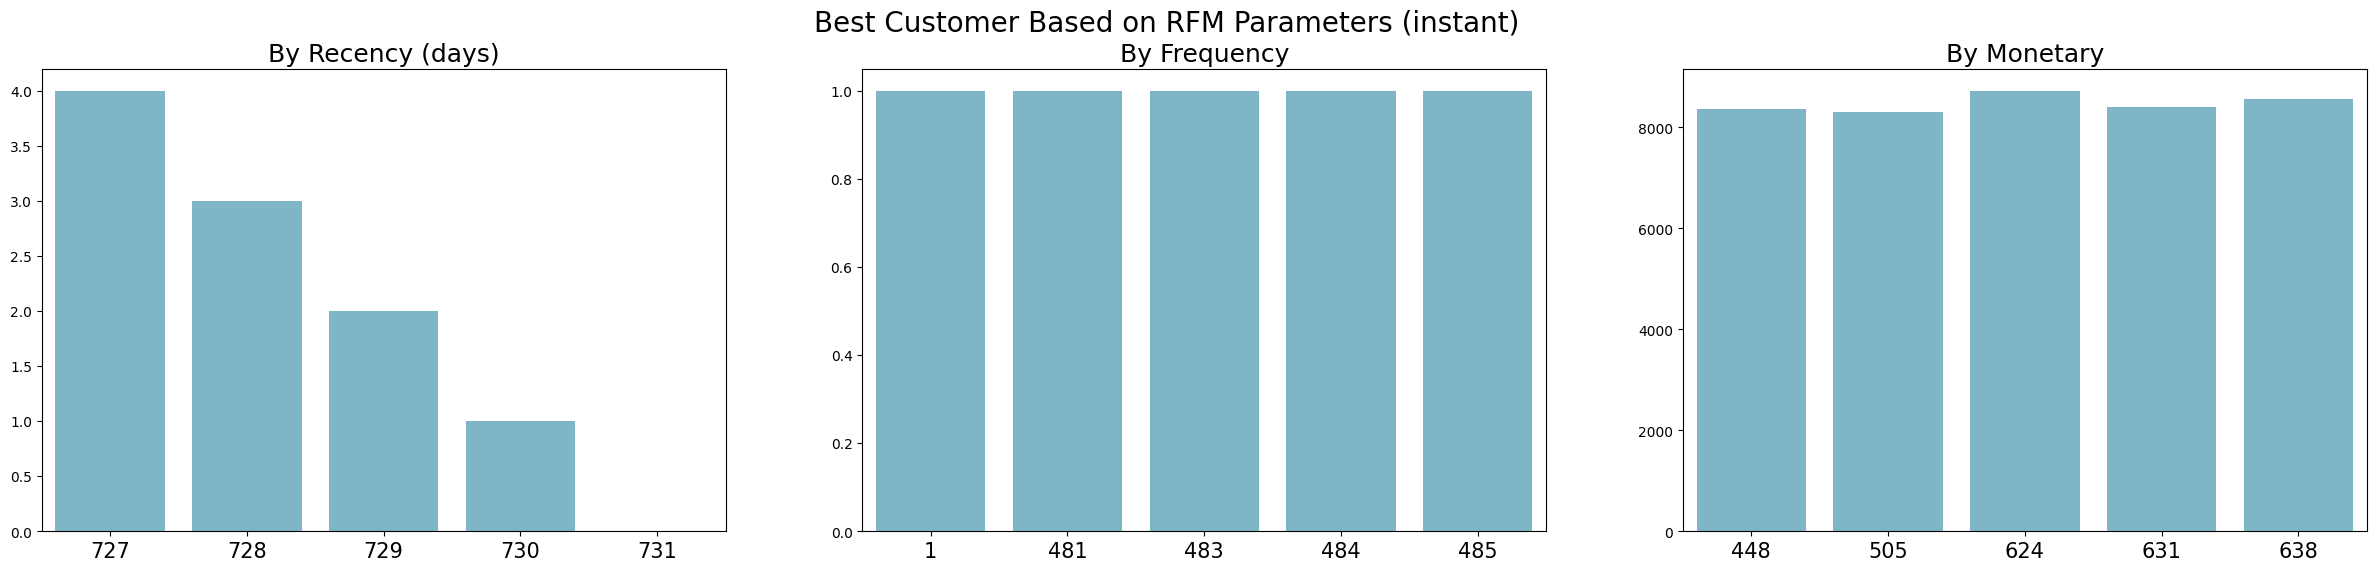

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (instant)", fontsize=20)
plt.show()

- Recency: Melihat kapan terakhir seorang peminjam  melakukan transaksi.
- Frequency: Mengidentifikasi seberapa sering seorang peminjam melakukan transaksi.
- Monetary: Mengidentifikasi seberapa besar revenue yang berasal dari peminjam tersebut.

In [31]:
day_df.to_csv("all_data.csv", index=False)